In [3]:
import pandas as pd

# Load cleaned data
merged_data = pd.read_csv('../data/merged_data.csv')

# Display info
print(merged_data.info())

# Descriptive stats
print(merged_data.describe())

# Display first few rows
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265518 entries, 0 to 265517
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE          265518 non-null  object 
 1   MORTGAGE30US  265518 non-null  float64
 2   RegionID      265518 non-null  int64  
 3   SizeRank      265518 non-null  int64  
 4   RegionName    265518 non-null  object 
 5   RegionType    265518 non-null  object 
 6   StateName     265518 non-null  object 
 7   HomeValue     265518 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 16.2+ MB
None
        MORTGAGE30US       RegionID       SizeRank      HomeValue
count  265518.000000  265518.000000  265518.000000  265518.000000
mean        5.135040  412446.539150     462.268456      11.901033
std         1.389236   77687.510935     268.266395       0.497487
min         2.684000  394297.000000       1.000000      10.210842
25%         3.942500  394547.000000     231.000000  

,DATE,MORTGAGE30US,RegionID,SizeRank,RegionName,RegionType,StateName,HomeValue
0,2000-01-01,8.21,394913,1,"New York, NY",msa,NY,12.288222
1,2000-01-01,8.21,753899,2,"Los Angeles, CA",msa,CA,12.309080
2,2000-01-01,8.21,394463,3,"Chicago, IL",msa,IL,11.936283
3,2000-01-01,8.21,394514,4,"Dallas, TX",msa,TX,11.743644
4,2000-01-01,8.21,394692,5,"Houston, TX",msa,TX,11.710229


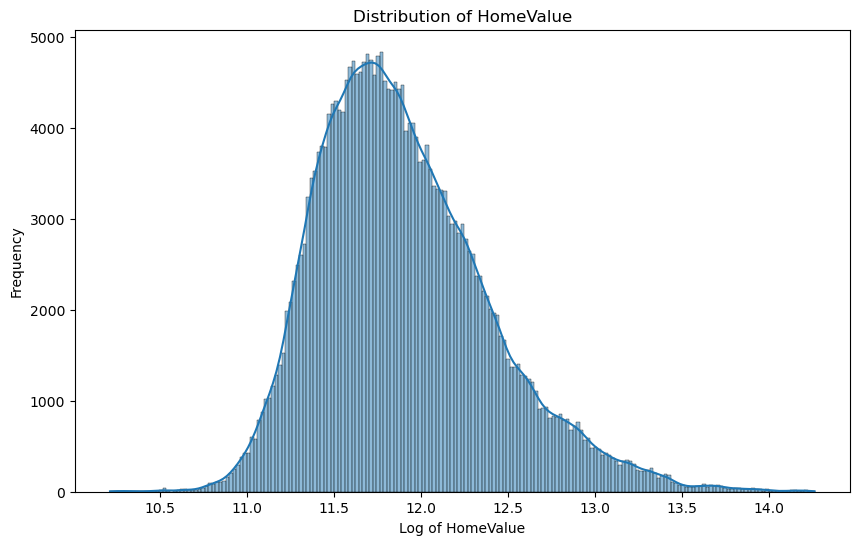

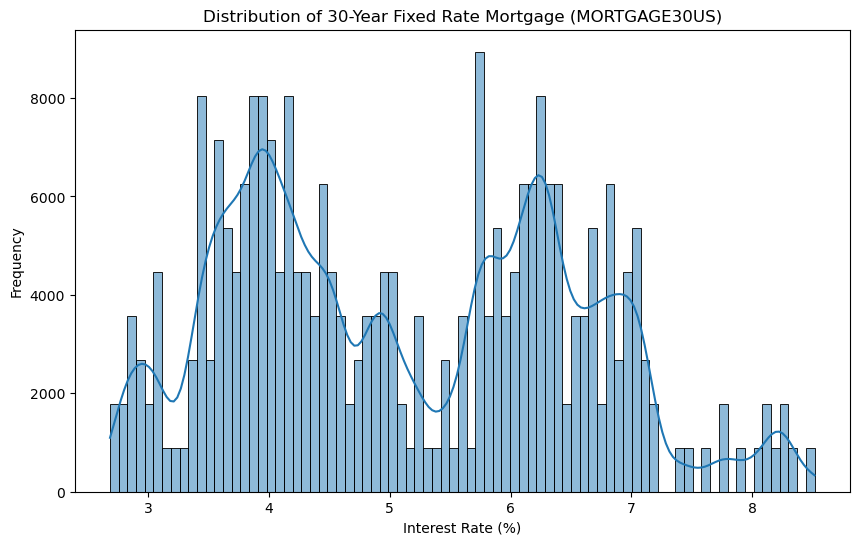

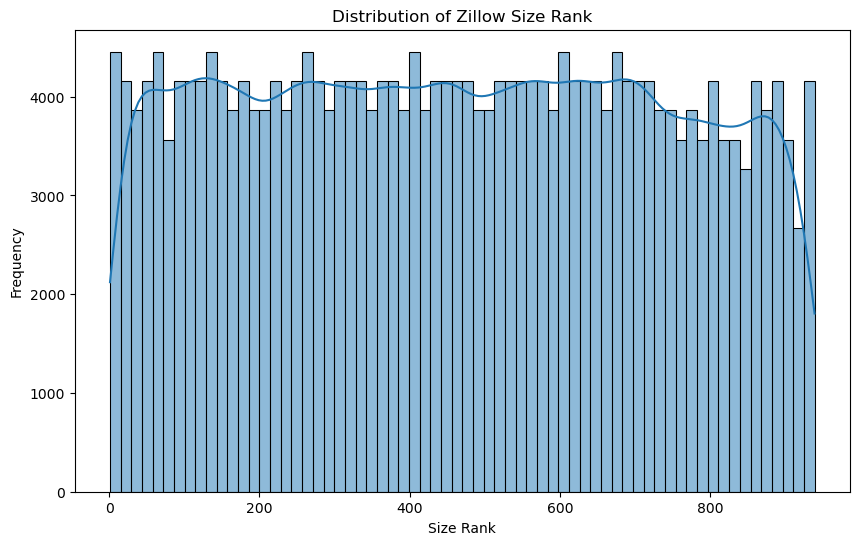

In [5]:
# Distribution of HomeValue
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(merged_data['HomeValue'], kde=True)
plt.title('Distribution of HomeValue')
plt.xlabel('Log of HomeValue')
plt.ylabel('Frequency')
plt.show()

# Distribution of MORTGAGE30US
plt.figure(figsize=(10,6))
sns.histplot(merged_data['MORTGAGE30US'], kde=True)
plt.title('Distribution of 30-Year Fixed Rate Mortgage (MORTGAGE30US)')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Distribution of SizeRank
plt.figure(figsize=(10,6))
sns.histplot(merged_data['SizeRank'], kde=True)
plt.title('Distribution of Zillow Size Rank')
plt.xlabel('Size Rank')
plt.ylabel('Frequency')
plt.show()

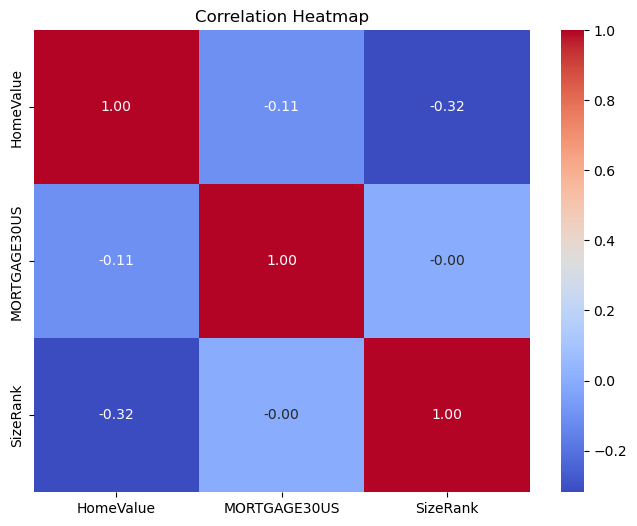

In [6]:
# Correlation heatmap
correlation_matrix = merged_data[['HomeValue', 'MORTGAGE30US', 'SizeRank']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

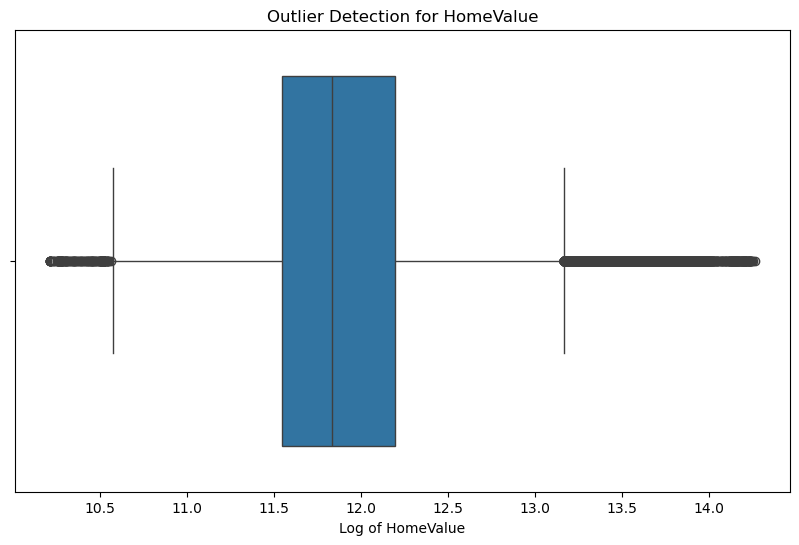

Number of outliers: 4959


In [7]:
# Detect outliers using using IQR
Q1 = merged_data['HomeValue'].quantile(0.25)
Q3 = merged_data['HomeValue'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (merged_data['HomeValue'] < (Q1 - 1.5 * IQR)) | (merged_data['HomeValue'] > (Q3 + 1.5 * IQR))

# Plotting outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=merged_data['HomeValue'])
plt.title('Outlier Detection for HomeValue')
plt.xlabel('Log of HomeValue')
plt.show()

# Display outliers
outliers = merged_data[outlier_condition]
print(f"Number of outliers: {outliers.shape[0]}")

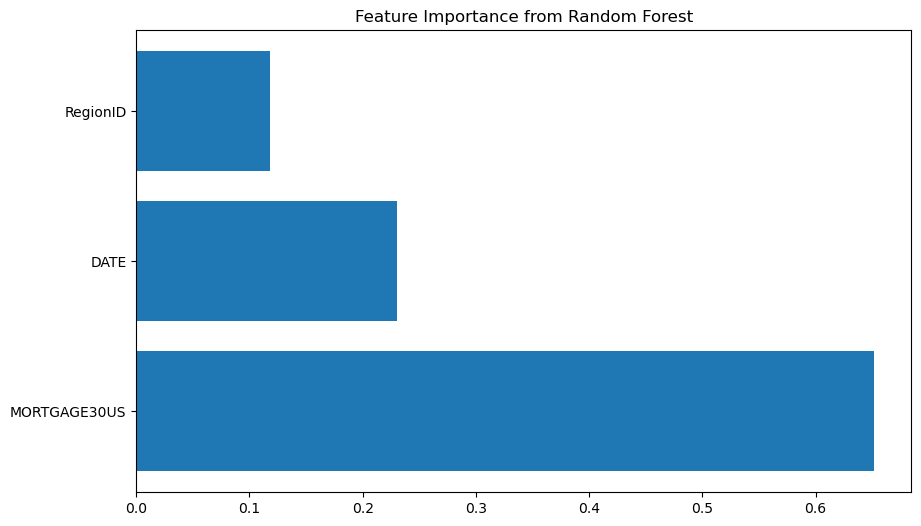

In [7]:
# Feature importance
import joblib

rf_model = joblib.load('../random_forest_model.pkl')

importances = rf_model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(importances)), [importances[i] for i in indices], align='center')
plt.yticks(range(len(importances)), [merged_data.columns[i] for i in indices])
plt.title('Feature Importance from Random Forest')
plt.show()